In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data sets
url_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

covid_cases = pd.read_csv(url_cases)
covid_deaths = pd.read_csv(url_deaths)
covid_recoveries = pd.read_csv(url_recovered)
happiness_data = pd.read_csv("worldwide_happiness_report.csv")

In [3]:
# Dropping the unneccesary columns
covid_cases.drop(["Lat", "Long"], axis=1, inplace=True)
covid_cases = covid_cases.groupby("Country/Region").sum()

covid_deaths.drop(["Lat", "Long"], axis=1, inplace=True)
covid_deaths = covid_deaths.groupby("Country/Region").sum()

covid_recoveries.drop(["Lat", "Long"], axis=1, inplace=True)
covid_recoveries = covid_recoveries.groupby("Country/Region").sum()

columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_data.drop(columns_to_dropped,axis=1 , inplace=True)

In [4]:
#changing a new country names so the can match later
covid_cases = covid_cases.rename(index={"US":"United States", "Taiwan*":"Taiwan",
                                        "Korea, South":"South Korea"})


covid_deaths = covid_deaths.rename(index={"US":"United States", "Taiwan*":"Taiwan",
                                          "Korea, South":"South Korea"})

covid_recoveries = covid_recoveries.rename(index={"US":"United States", "Taiwan*":"Taiwan", "Korea, South":"South Korea"})

happiness_data.set_index(["Country or region"], inplace=True)

In [5]:
#calculating the average daily incease in cases
avg_covid_cases = [covid_cases.loc[country].diff().mean() for country in covid_cases.index]
avg_cases = pd.DataFrame(data={"Average daily cases":avg_covid_cases}, index=covid_cases.index)

avg_covid_deaths = [covid_deaths.loc[country].diff().mean() for country in covid_deaths.index]
avg_deaths = pd.DataFrame(data={"Average daily deaths":avg_covid_deaths}, index=covid_deaths.index)

avg_covid_recoveries = [covid_recoveries.loc[country].diff().mean() for country in covid_recoveries.index]
avg_recoveries = pd.DataFrame(data={"Average daily recoveries":avg_covid_recoveries}, index = covid_recoveries.index)

In [6]:
#joining the cases data onto the happiness data
joined_cases = avg_cases.join(happiness_data).copy()
joined_deaths = avg_deaths.join(happiness_data).copy()
joined_recoveries = avg_recoveries.join(happiness_data).copy()

In [8]:
infections = np.log(joined_cases["Average daily cases"])
infections= infections.replace([-np.inf, np.inf], np.nan).dropna()
gdp_infections = joined_deaths["GDP per capita"][infections.index]


deaths = np.log(joined_deaths["Average daily deaths"])
deaths = deaths.replace([-np.inf, np.inf], np.nan).dropna()
gdp_deaths = joined_deaths["GDP per capita"][deaths.index]

recoveries = np.log(joined_recoveries["Average daily recoveries"])
recoveries = recoveries.replace([-np.inf, np.inf], np.nan).dropna()
gdp_recoveries = joined_deaths["GDP per capita"][recoveries.index]

C:\Users\tobia\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Averagy daily infections (logarithmic)')

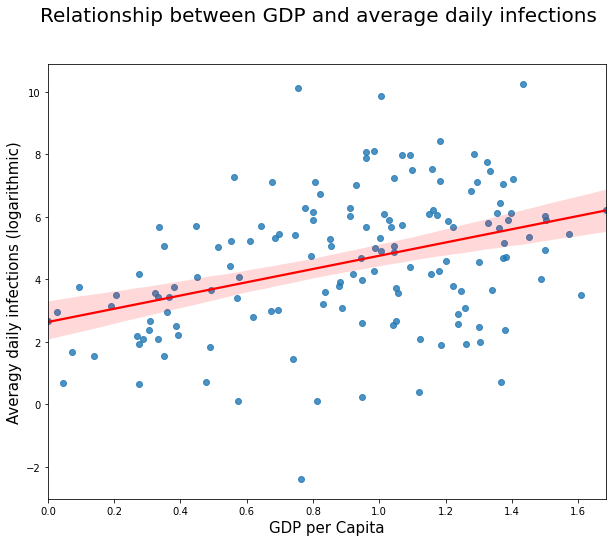

In [9]:
fig = plt.figure(1, figsize=(10,8))
fig.suptitle("Relationship between GDP and average daily infections", fontsize=20)
b = sns.regplot(gdp_infections, infections, line_kws={'color': 'red'})
b.set_xlabel("GDP per Capita",fontsize=15)
b.set_ylabel("Averagy daily infections (logarithmic)",fontsize=15)

Text(0, 0.5, 'Averagy daily deaths (logarithmic)')

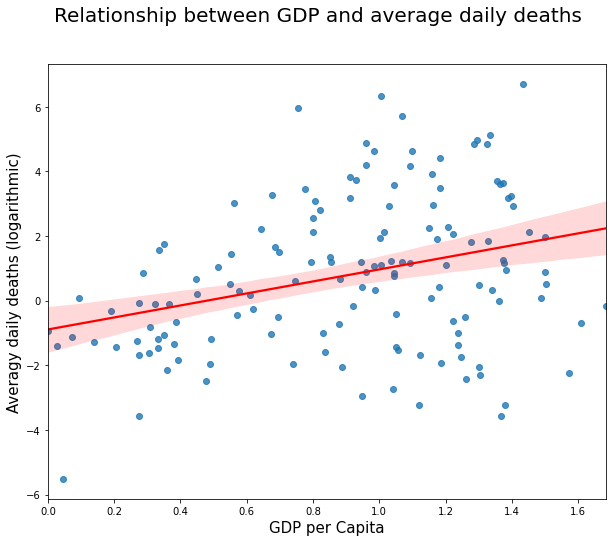

In [10]:
fig = plt.figure(2, figsize=(10,8))
fig.suptitle("Relationship between GDP and average daily deaths", fontsize=20)
b = sns.regplot(gdp_deaths, deaths, fit_reg=True, line_kws={'color': 'red'})
b.set_xlabel("GDP per Capita",fontsize=15)
b.set_ylabel("Averagy daily deaths (logarithmic)",fontsize=15)

Text(0, 0.5, 'Averagy daily recoveries (logarithmic)')

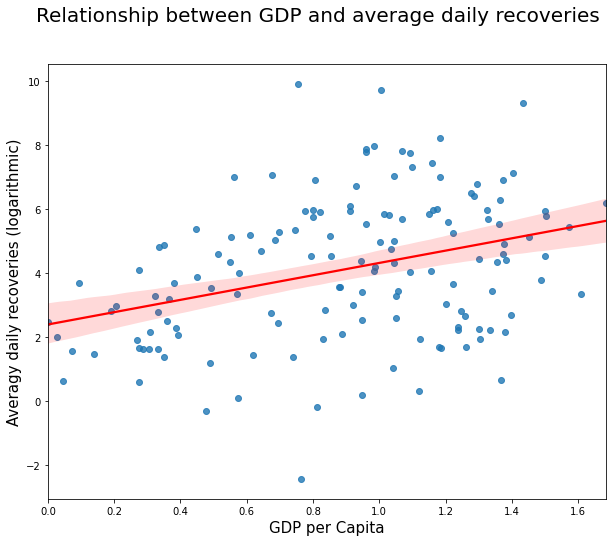

In [11]:
fig = plt.figure(3, figsize=(10,8))
fig.suptitle("Relationship between GDP and average daily recoveries", fontsize=20)
b = sns.regplot(gdp_recoveries, recoveries, fit_reg=True, line_kws={'color': 'red'})
b.set_xlabel("GDP per Capita",fontsize=15)
b.set_ylabel("Averagy daily recoveries (logarithmic)",fontsize=15)

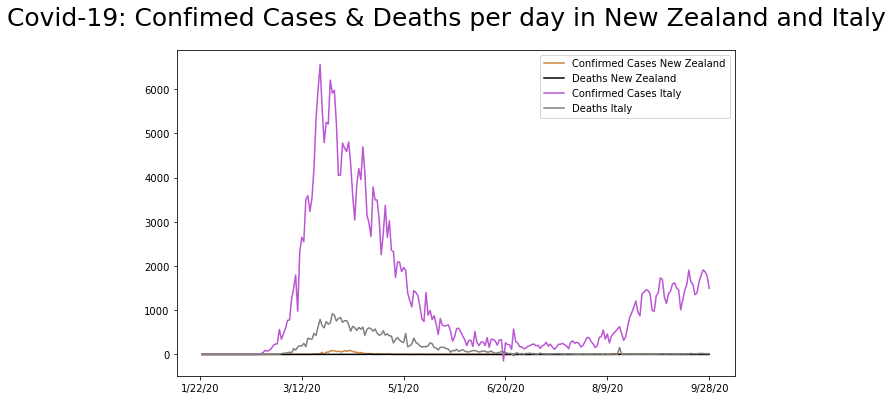

In [12]:
#plots new cases and new deaths per day of two countries vs eachother
country_one = "New Zealand"
country_two = "Italy"

fig = plt.figure(1, figsize=(10, 6))
fig.suptitle(f"Covid-19: Confimed Cases & Deaths per day in {country_one} and {country_two}", fontsize=25)
covid_cases.loc[country_one].diff().plot(color="peru")
covid_deaths.loc[country_one].diff().plot(color="black")
covid_cases.loc[country_two].diff().plot(color="mediumorchid")
covid_deaths.loc[country_two].diff().plot(color="grey")
plt.legend([f"Confirmed Cases {country_one}", f"Deaths {country_one}", f"Confirmed Cases {country_two}", f"Deaths {country_two}"])

In [17]:
covid_deaths.loc["United States"].diff()[-1]

1403.0